# CEE Health Hack 2022

## Exploratory Data Analysis

In [57]:
import pandas as pd
import json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from collections import defaultdict

In [37]:
df_labs = pd.read_csv("data/LabsALL IOL.csv", delimiter =";")

/var/folders/k2/pqxx9lkj6212kf33b5p43rqm0000gn/T/ipykernel_60184/2593776818.py:1: DtypeWarning: Columns (5,8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_labs = pd.read_csv("data/LabsALL IOL.csv", delimiter =";")


In [38]:
df_labs[:10]

,Patient,Report,ID,EntryDate,EntryTime,Code,NCLP,Analyte,ValueNumber,ValueText,RefHigh,RefLow,Unit
0,995,1858548,23204889,28.04.2015,09:00:00,20044,NaN,Komentar,NaN,Plasma EDTA-KO-2ml : PHP,NaN,NaN,NaN
1,1218300,1803518,22522997,29.04.2015,07:00:00,91001,NaN,ACM Cross-match,NaN,Negativní,NaN,NaN,NaN
2,1218300,1848180,23074429,29.04.2015,07:00:00,91001,NaN,ACM Cross-match,NaN,Negativní,NaN,NaN,NaN
3,202237,1847832,23071836,30.04.2015,00:00:00,91012,NaN,LSA2 HLA protilátky 2.třídy,NaN,"DQ8, DR53, DQ9, DQ7, DQ4, DQ2, DR10, DR9, DR14...",NaN,NaN,NaN
4,202237,1847832,23071835,30.04.2015,00:00:00,91013,NaN,LSA2 DSA 2.třída,NaN,C1q pozitivní:DQ7(20500MFI),NaN,NaN,NaN
5,995,1799896,22477220,05.05.2015,08:00:00,NaN,3571.0,INR,2,NaN,NaN,NaN,NaN
6,995,1799901,22477270,12.05.2015,08:00:00,NaN,3571.0,INR,3,NaN,NaN,NaN,NaN
7,1214504,1803477,22522677,25.05.2015,00:00:00,NaN,16586.0,DNA-A,NaN,"01,23",NaN,NaN,NaN
8,1214504,1803477,22522676,25.05.2015,00:00:00,NaN,16588.0,DNA-B,NaN,"40,57",NaN,NaN,NaN
9,1214504,1803477,22522675,25.05.2015,00:00:00,NaN,16602.0,DNA-DRB1,NaN,"01,07",NaN,NaN,NaN


### Analysis of alivecors data

In [59]:
d_counts = 0
diag_counts = 0
strips_counts = 0
diagnoses_counts = defaultdict(int)

for d in listdir("data/hackathon-alivecors"):
    if d.startswith("AC"):
        print(d)
        d_counts += 1
        for sub_d in listdir(f"data/hackathon-alivecors/{d}"):
            print(" ", sub_d)
            if sub_d == "dg.txt":
                with open(f"data/hackathon-alivecors/{d}/dg.txt", errors='ignore') as f_dg:
                    dg = json.load(f_dg)
                    print(dg)
                    for diagnosis in dg:
                        diagnoses_counts[diagnosis] += 1
                
                    diag_counts += len(dg)
                    print(len(dg))
            elif sub_d == "ecg":
                strips_counts += len(listdir(f"data/hackathon-alivecors/{d}/{sub_d}"))
                print(len(listdir(f"data/hackathon-alivecors/{d}/{sub_d}")))

print(diag_counts, d_counts, strips_counts, diag_counts, diagnoses_counts)
            

AC1461116
  ecg
21
  dg.txt
['R00.2: Palpitace', 'R00.2: Palpitace', 'R00.2: Palpitace']
3
AC1307772
  ecg
38
  dg.txt
['K21.0: Gastroezofageln refluxn onemocnn s ezofagitidou, st.p. fundoplikaci 2017', 'K21.0: Gastroezofageln refluxn onemocnn s ezofagitidou, st.p. fundoplikaci 2017', 'K21.0: Gastroezofageln refluxn onemocnn s ezofagitidou, st.p. fundoplikaci 2017', 'K21.0: Gastroezofageln refluxn onemocnn s ezofagitidou, st.p. fundoplikaci 2017', 'R00.2: Palpitace k vyeten']
5
AC1367451
  ecg
27
  dg.txt
['I47.1: Supraventrikulrn tachykardie, st.p. ablaci pro flutter sn a AVNRT', 'I49.1: Pedasn depolarizace sn', 'Dysfunkce ttn lzy. Hyperlipidemie. Bikuspidln Ao chlope.', 'St.p. embolizaci do a retinae 11/17, rezidua vpadek zornho pole', 'I47.1: Supraventrikulrn tachykardie, st.p. ablaci pro flutter sn a AVNRT', 'I49.1: Pedasn depolarizace sn', 'Dysfunkce ttn lzy. Hyperlipidemie. Bikuspidln Ao chlope.', 'St.p. embolizaci do a retinae 11/17, rezidua vpadek zornho pole', 'I47.1: Supraven

In [62]:
for d, c in sorted(diagnoses_counts.items(), key=lambda x: x[1], reverse=True):
    print(c, d)

31 I10: Esenciln (primrn) hypertenze
17 R00.2: Palpitace
14 E78.0: ist hypercholesterolemie
12 I35.1: Stedn vznamn a vznamn aortln regurgitace
12 Z95.0: St.p. implantaci ICD v r. 2013 v rmci primrn prevence NSS, pstroj CURRENT VR CD1211-36 / St. Jude Medical,
11 V anamnze dokumentovan v.s. SVT v ICD max. 40 sec, nyn bez arytmi
11 I48.0: Paroxyzmln fibrilace sn
9 I42.1: Obstruktivn hypertrofick kardiomyopatie
9 I42.1: Hypertrofick kardiomyopatie s hypertofii septa a obstrukc v LVOT, st.p. myectomii v r. 2013
8 I47.9: Paroxyzmln tachykardie NS
7 E87.6: Hypokalemie
7 I48.0: Paroxyzmln fibrilace sn od r.2008, RFA IP 05/2016, TTE s normlnm nlezem
7 I48.3: Typick flutter sn, 1 epizoda 03/2016
6 E03.8: Jin uren hypotyreza
6 I48.0: Paroxyzmln fibrilace sn CHA2DS2-VASc 2, opakovan po EKV (naposledy 23.10., od t doby SR), AK terapie Eliquis, vstupn SR - st.p. RFA FiS 6.11.2020.
6 E78.5: Hyperlipidemie na terapii
6 E03.9: Hypotyreza na terapii
6 R73.0: Porucha gluk. tolerance - zatm bez dg. DM 2.

In [63]:
print(len(diagnoses_counts))

151


Together we have data from 54 patients, out of which 40 have set diagnosis. Total number of available ECG strips is 1683 and the number of different diagnosis types that are identified is 151, where the most common diagnosis was identified in 31 cases. The available dataset is too small to build a relieble algorithm that would be able to set diagnose from the ECG reading. However, we will buid a model on with convolutional neuralnetworks, that could pitentially, in case of enough evailable data, separate normal ECGs from abnormal ones. 

## Classification Model on ECG data - Convolutional Neural Networks

In [20]:
with open("data/hackathon-alivecors/AC7812/ecg/strip1.txt") as f:
    j1 = json.load(f)
    
with open("data/hackathon-alivecors/AC7812/ecg/strip2.txt") as f:
    j2 = json.load(f)

In [30]:
j1['data']['enhanced']['samples']

dict_keys(['leadI', 'leadII', 'leadIII', 'AVR', 'AVL', 'AVF'])

<AxesSubplot: >

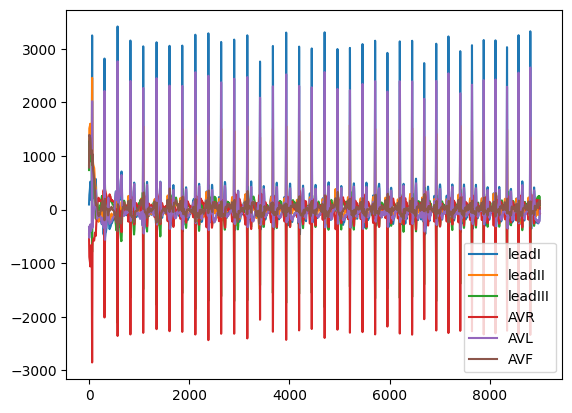

In [71]:
pd.DataFrame(j2['data']['enhanced']['samples']).plot()

In [72]:
pd.DataFrame(j2['data']['enhanced']['samples']).shape

(9000, 6)

In [74]:
X_paths = []
Y_values = []

for d in listdir("data/hackathon-alivecors"):
    if d.startswith("AC"):
        print(d)
        for sub_d in listdir(f"data/hackathon-alivecors/{d}"):
            print(" ", sub_d)
            if sub_d == "ecg":
                for s in listdir(f"data/hackathon-alivecors/{d}/{sub_d}"):
                    X_paths.append(f"data/hackathon-alivecors/{d}/{sub_d}/{s}")
                    Y_values.append(int("dg.txt" in listdir(f"data/hackathon-alivecors/{d}")))

AC1461116
  ecg
  dg.txt
AC1307772
  ecg
  dg.txt
AC1367451
  ecg
  dg.txt
AC1238426
  .DS_Store
  ecg
  dg.txt
AC1248107
  ecg
  dg.txt
AC1266469
  ecg
  dg.txt
AC1210845
  .DS_Store
  ecg
  dg.txt
AC1473213
  ecg
  dg.txt
AC1477878
  ecg
  dg.txt
AC116529
  ecg
  dg.txt
AC1475782
  ecg
  dg.txt
AC1477138
  ecg
AC1317003
  .DS_Store
  ecg
  dg.txt
AC1241363
  ecg
AC214715
  ecg
  dg.txt
AC1479088
  ecg
AC1266552
AC1267225
  ecg
  dg.txt
AC1473710
  ecg
  dg.txt
AC1478905
  ecg
AC1470210
  ecg
  dg.txt
AC219164
  ecg
  dg.txt
AC1478676
  ecg
  dg.txt
AC1367876
  ecg
AC155032
  .DS_Store
  ecg
AC1480690
  ecg
  dg.txt
AC1476337
  ecg
AC1480022
  ecg
AC1470806
  ecg
  dg.txt
AC1248763
  ecg
  dg.txt
AC1331010
  ecg
  dg.txt
AC1480424
  ecg
AC1370640
  ecg
  dg.txt
AC1478370
  ecg
  dg.txt
AC1474318
  .DS_Store
  ecg
  dg.txt
AC1208169
  ecg
  dg.txt
AC1260270
  ecg
  dg.txt
AC1477559
  ecg
  dg.txt
AC1405380
  .DS_Store
  ecg
  dg.txt
AC1366861
  ecg
  dg.txt
AC1407857
  ecg
AC1476802
  

In [88]:
def read_ecg(path):
    with open(path) as f:
        j = json.load(f)
    
    df = pd.DataFrame(j["data"]["enhanced"]["samples"])
    return df.to_numpy()

    
    

In [92]:
X_final, Y_final = [], [] 

for p, y in zip(X_paths, Y_values):
    x = read_ecg(p)
    if x.shape == (9000, 6):
        X_final.append(x)
        Y_final.append(y)
        
X_final = np.array(X_final)
Y_final = np.array(Y_final)

In [93]:
print(X_final.shape, Y_final.shape)

(1666, 9000, 6) (1666,)


In [98]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_final, Y_final, test_size=0.33, random_state=42)

In [94]:
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, Flatten, Dense

In [99]:
model = Sequential()
model.add(Conv1D(filters = 128, kernel_size = 5, activation = 'relu', input_shape = (9000, 6)))
model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

# compile the model - use categorical crossentropy, and the adam optimizer
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [100]:
model.fit(X_train, y_train, batch_size = 32, epochs= 5, verbose = 1)

Epoch 1/5
35/35 [==============================] - 24s 660ms/step - loss: 1223.8713 - accuracy: 0.6246
Epoch 2/5
35/35 [==============================] - 19s 533ms/step - loss: 152.3163 - accuracy: 0.8127
Epoch 3/5
35/35 [==============================] - 20s 565ms/step - loss: 40.2950 - accuracy: 0.9032
Epoch 4/5
35/35 [==============================] - 19s 543ms/step - loss: 12.0268 - accuracy: 0.9561
Epoch 5/5
35/35 [==============================] - 19s 557ms/step - loss: 6.3842 - accuracy: 0.9704


In [108]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
 #   specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
 #   print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision#, specificity

In [103]:
y_train_preds_dense = model.predict(X_train, verbose = 1)
y_valid_preds_dense = model.predict(X_valid, verbose = 1)

18/18 [==============================] - 2s 86ms/step


In [105]:
thresh = (sum(y_train)/len(y_train))
thresh

0.764336917562724

In [109]:
print('Train');
print_report(y_train, y_train_preds_dense, thresh)
print('Valid');
print_report(y_valid, y_valid_preds_dense, thresh);

Train
AUC:0.994
accuracy:0.987
recall:0.984
precision:0.999
prevalence:0.764
 
Valid
AUC:0.477
accuracy:0.640
recall:0.823
precision:0.726
prevalence:0.738
 


#### Analysis of other parients data 

In [112]:
data = {}

for d in listdir("data/hackathon"):
    print(d)
    
    patients_data = {}

    for sub_d in listdir(f"data/hackathon/{d}"):
        print(" ", sub_d)

        patients_data[sub_d.split(".txt")[0]] = f"data/hackathon/{d}/{sub_d}"
        
    data[d] = patients_data
        

44966495
  dg.txt
87593464
  waist.txt
  bp.txt
  weight.txt
  dg.txt
47624500
  bp.txt
  weight.txt
  dg.txt
69647733
  dg.txt
73693273
81079941
  dg.txt
14422216
  dg.txt
46024536
  energy.txt
  hrresting.txt
  steps.txt
  ecg
  weight.txt
  dg.txt
  hrwalking.txt
  exercise.txt
82036724
  dg.txt
11523250
  dg.txt
82214985
  dg.txt
99718054
  dg.txt
88060001
  dg.txt
42267825
  dg.txt
64591582
  dg.txt
36902049
  energy.txt
  hrresting.txt
  steps.txt
  ecg
  bp.txt
  dg.txt
  hrwalking.txt
18051903
  dg.txt
74447121
  dg.txt
96810959
  dg.txt
80685593
  dg.txt
40452494
  dg.txt
66681764
  dg.txt
18459357
  dg.txt
82500567
  dg.txt
40948246
  energy.txt
  waist.txt
  steps.txt
  bp.txt
  weight.txt
  dg.txt
  exercise.txt
67980506
  dg.txt
56112320
  energy.txt
  steps.txt
  weight.txt
  dg.txt
79631773
  bp.txt
  weight.txt
  dg.txt
71506218
  weight.txt
  dg.txt
52737427
  dg.txt
33811357
  dg.txt
52745007
  dg.txt
39827563
  energy.txt
  hrresting.txt
  steps.txt
  weight.txt
  dg

NotADirectoryError: [Errno 20] Not a directory: 'data/hackathon/.DS_Store'

In [126]:
df_other_data = pd.DataFrame.from_dict(data, orient="index")

<AxesSubplot: >

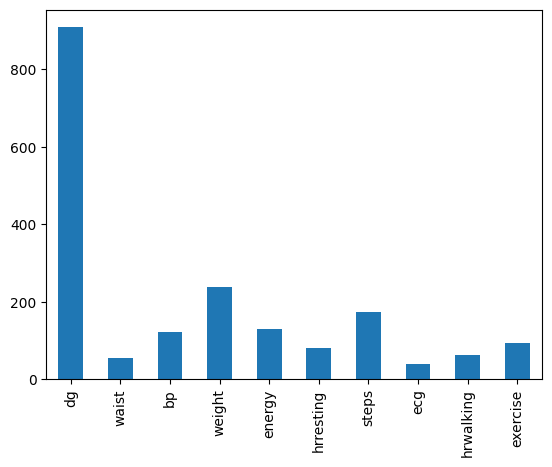

In [123]:
pd.DataFrame.from_dict(data, orient="index").count().plot.bar()

In [128]:
diagnoses_counts_2 = defaultdict(int)

for d_path in df_other_data["dg"]:
    with open(d_path, errors='ignore') as f_dg:
        dg = json.load(f_dg)
        # print(dg)
        for diagnosis in dg:
            diagnoses_counts_2[diagnosis] += 1


In [129]:
for d, c in sorted(diagnoses_counts_2.items(), key=lambda x: x[1], reverse=True):
    print(c, d)

2570 Z94.0: Transplantovan ledvina
2517 I10: Esenciln (primrn) hypertenze
1993 I15.1: Sekundrn hypertenze pi jinch onemocnnch ledvin
1662 E78.2: Smen hyperlipidemie
1103 N18.3: Chronick onemocnn ledvin, stadium 3
1065 E10.7: Diabetes mellitus 1. typu s mnohoetnmi komplikacemi
1064 E10.9: Diabetes mellitus 1. typu bez komplikac
805 N18.5: Chronick onemocnn ledvin, stadium 5
649 E11.9: Diabetes mellitus 2. typu bez komplikac
640 N18.2: Chronick onemocnn ledvin, stadium 2
612 Arteriln hypertenze
544 Z94.4: Transplantovan jtra
466 D63.8: Anemie pi jinch chronickch nemocech zaazench jinde
412 E78.5: Hyperlipidemie NS
406 Hypertenze
371 I15.9: Sekundrn hypertenze NS
367 Obezita
364 E79.0: Hyperurikemie bez znmek zntliv artritidy a tof
364 E06.3: Autoimunitn tyroiditida
342 Hyperurikmie
322 Dyslipidmie
321 E11.7: Diabetes mellitus 2. typu s mnohoetnmi komplikacemi
297 E10.7: Diabetes mellitus zvisl na inzulinu - s mnohoetnmi komplikacemi
291 E78.0: ist hypercholesterolemie
283 N18.9: Chronick